# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цель практической работы

Научиться работать с аномалиями в данных, строить визуализации, а также выявлять зависимости между переменными с помощью библиотеки Matplotlib.

## Что входит в практическую работу

1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графики для количественных переменных.
4. Построить графики для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


In [ ]:
## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [2]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [3]:
# Ваш код здесь
df = pd.read_csv('vehicles_dataset_upd.csv')
df.head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

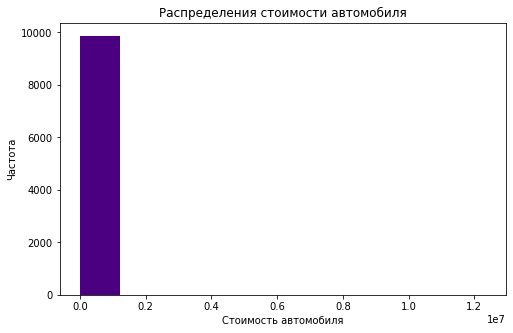

In [4]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df.price, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределения стоимости автомобиля');

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

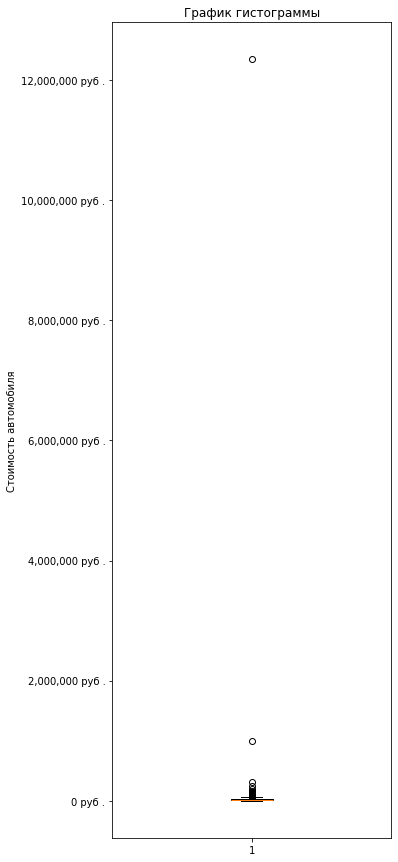

In [5]:
# Ваш код здесь
plt.figure(figsize=(5 , 15))
plt.boxplot(df.price, vert = True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'{x:,.0f} руб .'))
plt.ylabel('Стоимость автомобиля')
plt.title('График гистограммы')
plt.show()

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [6]:
# Ваш код здесь
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [7]:
# Ваш код здесь
Q3 = df.price.quantile(0.75)
Q1 = df.price.quantile(0.25)
print(Q3 , Q1)

27990.0 7800.0


6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [8]:
# Ваш код здесь
def calculate_outliers(data):

    q25 = data.quantile(0.25)

    q75 = data.quantile(0.75)

    iqr = q75 - q25

    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries


In [9]:
boundaries = calculate_outliers(df.price)
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1])
is_outlier.sum()

207

7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [10]:
# Ваш код здесь
df[sorted(is_outlier)]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
9661,7302057859,https://collegestation.craigslist.org/ctd/d/li...,college station,https://collegestation.craigslist.org,28888,2014,chevrolet,1500,gas,96430,clean,automatic,https://images.craigslist.org/00q0q_7U03fF1AMX...,CALL OR TEXT 512-914-8066 www.GETADIESEL.com ...,tx,30.649402,-97.867069,2021-04-05T10:04:15-0500,high,2021-04-05 15:04:15+00:00
9662,7311876668,https://newjersey.craigslist.org/ctd/d/paterso...,north jersey,https://newjersey.craigslist.org,22495,2014,bmw,428 i,gas,77514,clean,automatic,https://images.craigslist.org/00m0m_diqx3CQGqX...,2014 BMW 428 I CONVERTIBLE COUPE Offered b...,nj,40.923344,-74.143356,2021-04-24T11:39:00-0400,high,2021-04-24 15:39:00+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00
9664,7316816402,https://detroit.craigslist.org/okl/ctd/d/fento...,detroit metro,https://detroit.craigslist.org,32000,2011,ford,f-350 super duty,diesel,155616,clean,automatic,https://images.craigslist.org/00m0m_h33dsIKm71...,2011 Ford F-350 Super Duty Lariat - White W...,mi,42.789850,-83.725960,2021-05-04T13:33:36-0400,high,2021-05-04 17:33:36+00:00
9665,7316859790,https://miami.craigslist.org/brw/ctd/d/coral-s...,south florida,https://miami.craigslist.org,6985,2012,volkswagen,jetta,gas,93000,clean,automatic,https://images.craigslist.org/00z0z_bADgeRHzT2...,2012 Volkswagen VW Jetta silver with Rims *...,fl,26.260826,-80.146554,2021-05-04T14:41:17-0400,low,2021-05-04 18:41:17+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9864,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9865,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9866,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [11]:
# Ваш код здесь
df[sorted(is_outlier)].tail(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
9853,7315251467,https://orlando.craigslist.org/cto/d/davenport...,orlando,https://orlando.craigslist.org,9500,2008,ford,f250 super duty 4x4,diesel,262000,clean,automatic,https://images.craigslist.org/00m0m_reTzyjJPnz...,2008 f250 XL work truck 262k miles. Automatic ...,fl,28.311200,-81.664300,2021-05-01T09:26:52-0400,low,2021-05-01 13:26:52+00:00
9854,7314913121,https://oklahomacity.craigslist.org/ctd/d/okla...,oklahoma city,https://oklahomacity.craigslist.org,7900,2007,rover,sport,gas,205000,clean,automatic,https://images.craigslist.org/00000_jfwiLj3PB1...,"2007 Land Rover Range Rover Sport HSE, loaded,...",ok,35.529798,-97.565518,2021-04-30T12:56:26-0500,low,2021-04-30 17:56:26+00:00
9855,7302701463,https://rmn.craigslist.org/ctd/d/rochester-201...,rochester,https://rmn.craigslist.org,19990,2013,volkswagen,eos sport convertible,gas,24294,clean,automatic,https://images.craigslist.org/01010_jVPWN962oM...,Carvana is the safer way to buy a car During t...,mn,44.010000,-92.470000,2021-04-06T12:51:16-0500,medium,2021-04-06 17:51:16+00:00
9856,7313922964,https://redding.craigslist.org/cto/d/redding-2...,redding,https://redding.craigslist.org,65900,2018,lincoln,navigator reserve,gas,28200,clean,automatic,https://images.craigslist.org/00v0v_9Kj5yr4e5L...,2018 navigator reserve in great condition If y...,ca,40.560500,-122.411600,2021-04-28T10:42:04-0700,high,2021-04-28 17:42:04+00:00
9857,7315173150,https://orangecounty.craigslist.org/cto/d/foun...,orange county,https://orangecounty.craigslist.org,10500,2007,lexus,gs350,gas,160230,clean,automatic,https://images.craigslist.org/00r0r_hNiY0p2edb...,2007 Lexus GS350 3.5 Model Clean title 160k ...,ca,33.725427,-117.969140,2021-04-30T21:04:00-0700,medium,2021-05-01 04:04:00+00:00
9858,7316175335,https://orangecounty.craigslist.org/cto/d/hunt...,orange county,https://orangecounty.craigslist.org,1575,1995,other,1988 Nisan,gas,120000,clean,manual,https://images.craigslist.org/00B0B_5t6BpiGoz9...,Really good running 88 Nissan. Has Sun roof. B...,ca,33.654019,-117.980606,2021-05-03T07:19:18-0700,low,2021-05-03 14:19:18+00:00
9859,7314767318,https://kalamazoo.craigslist.org/ctd/d/otsego-...,kalamazoo,https://kalamazoo.craigslist.org,20995,2013,ford,f-150,gas,120996,clean,automatic,https://images.craigslist.org/00s0s_luCnsDlZUm...,Midway Chevrolet address: 381 12th Street P...,mi,42.447943,-85.660118,2021-04-30T09:48:04-0400,medium,2021-04-30 13:48:04+00:00
9860,7306374320,https://cnj.craigslist.org/ctd/d/trenton-2000-...,central NJ,https://cnj.craigslist.org,3000,2000,lincoln,ls,gas,161969,clean,automatic,https://images.craigslist.org/01010_3I1x8RzjCe...,"2000 Lincoln LS Base 4dr V8 Sedan -- $$3,000 ...",nj,40.181570,-74.663384,2021-04-13T17:01:41-0400,low,2021-04-13 21:01:41+00:00
9861,7315504125,https://appleton.craigslist.org/ctd/d/fond-du-...,appleton-oshkosh-FDL,https://appleton.craigslist.org,8999,2013,dodge,grand caravan,gas,114730,clean,automatic,https://images.craigslist.org/00N0N_ZRZUujRLyf...,2013 Dodge Grand Caravan SE Mini-Van Drive i...,wi,43.790599,-88.446483,2021-05-01T16:01:36-0500,low,2021-05-01 21:01:36+00:00
9862,7305898015,https://fayar.craigslist.org/ctd/d/lowell-2015...,fayetteville,https://fayar.craigslist.org,22900,2015,ram,1500,diesel,151942,clean,automatic,https://images.craigslist.org/00T0T_i51M7KG335...,2015 RAM Ram Pickup 1500 4X4... THIS RAM IS LO...,ar,36.255400,-94.130800,2021-04-12T17:15:35-0500,high,2021-04-12 22:15:35+00:00


9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

*Подсказка*: обратите внимание на оператор "~" (тильда) при фильтрации исходного датафрейма. Это операция not, которая часто применяется для инвертирования логических значений. Советуем заглянуть в [документацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), чтобы получить представление о его работе на примерах использования.

In [12]:
# Ваш код здесь
IQR = Q3 - Q1
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5 * IQR
df_new = df[(df.price >= lower_bound) & (df.price <= upper_bound)]
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [13]:
# Ваш код здесь

stats = df.groupby('year',as_index=False).agg({'price' : 'mean'})
stats =stats.rename(columns={'year': 'Year' , 'price' : 'mean price'})
stats

,Year,mean price
0,1995,14583.744731
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,8378.784810
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,8897.080569


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

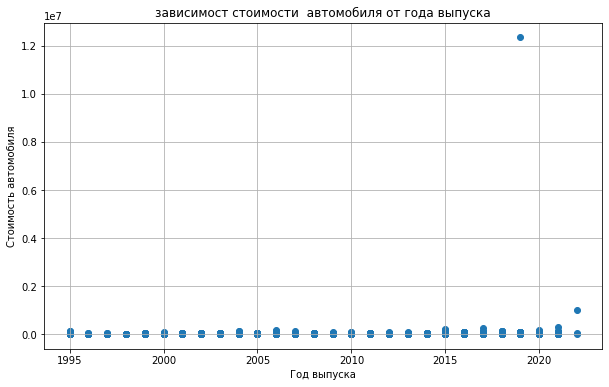

In [15]:
# Ваш код здесь
plt.figure(figsize=(10,6))
plt.scatter(df.year,df.price)
plt.title('зависимост стоимости  автомобиля от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Стоимость автомобиля')
plt.grid(True)
plt.show()

3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [16]:
# Ваш код здесь
grouped_df = df.groupby('year').size().reset_index(name='Количество автомобилей')
grouped_df

,year,Количество автомобилей
0,1995,427
1,1996,25
2,1997,44
3,1998,55
4,1999,81
5,2000,79
6,2001,122
7,2002,149
8,2003,185
9,2004,211


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [18]:
# Ваш код здесь
filtered_df = df[df.year <=2021]
filtered_df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [19]:
# Ваш код здесь
stats1 = filtered_df.groupby('year',as_index=False).agg({'price' : 'mean'})
stats1 =stats1.rename(columns={'year': 'Year' , 'price' : 'mean_price'})
stats1

,Year,mean_price
0,1995,14583.744731
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,8378.784810
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,8897.080569


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

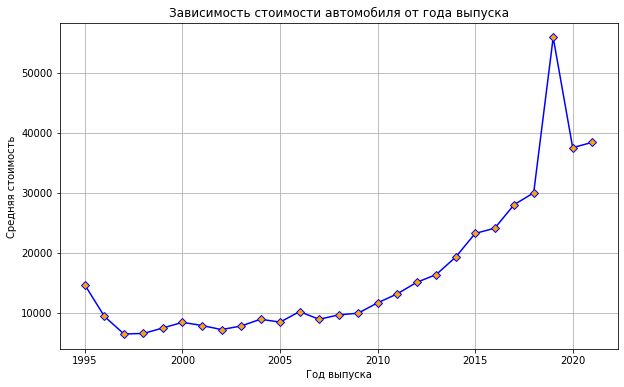

In [20]:
# Ваш код здесь
plt.figure(figsize=(10,6))
plt.plot(stats1.Year,stats1.mean_price, color = 'blue',marker = 'D', markerfacecolor='orange')
plt.title('Зависимость стоимости автомобиля от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя стоимость')
plt.grid(True)
plt.show()

In [ ]:
7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: _Да_

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: _нет_

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: _прямой , потому что обратная связь вкюлчает в себя отрицательный коэффицент_

In [21]:
df['year'].corr(df['price'])

0.07276283271737839

In [ ]:
# Ваш код здесь

8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

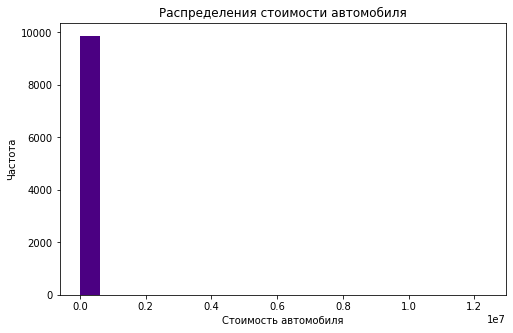

In [24]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(filtered_df.price, bins = 20 ,color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределения стоимости автомобиля');

9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [25]:
# Ваш код здесь
df_new.to_csv('vehicles_dataset_upd2.csv' , index = False)

### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


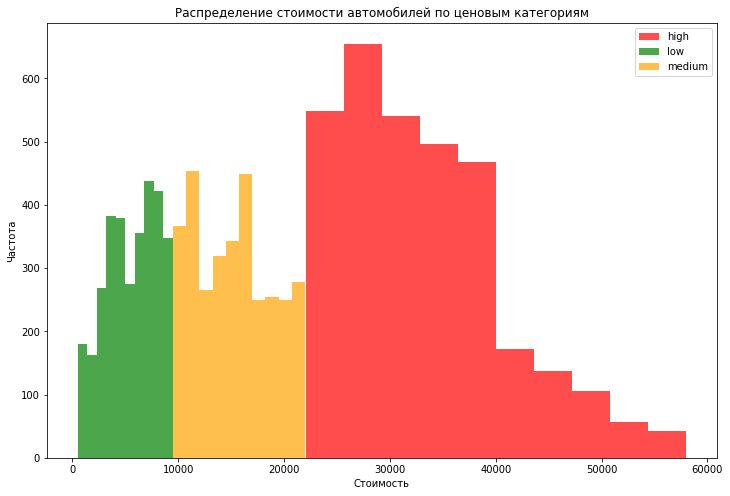

In [33]:
# Ваш код здесь

colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
plt.figure(figsize=(12, 8))

for category, group in df_new.groupby('price_category'):
    plt.hist(group.price, bins=10, alpha=0.7, color=colors[category], label=category)
plt.title('Распределение стоимости автомобилей по ценовым категориям')
plt.xlabel('Стоимость')
plt.ylabel('Частота')


plt.legend()

plt.show()

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

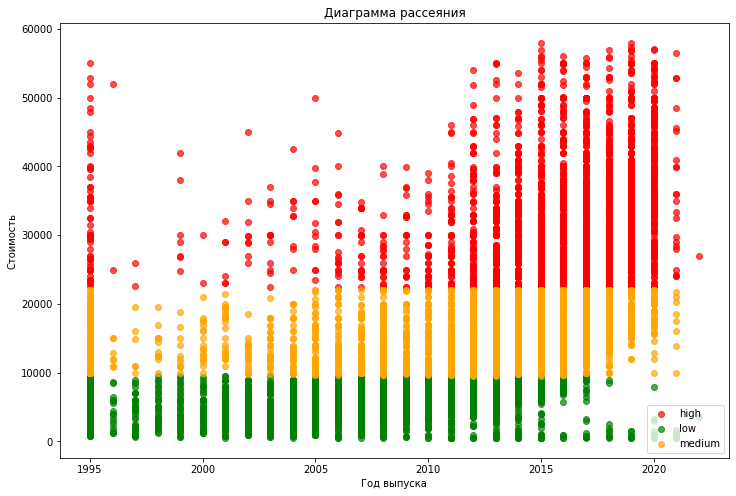

In [34]:
# Ваш код здесь
plt.figure(figsize=(12, 8))

for category, group in df_new.groupby('price_category'):
    plt.scatter(group.year, group.price, alpha=0.7, color=colors[category], label=category)
plt.title('Диаграмма рассеяния')
plt.xlabel('Год выпуска')
plt.ylabel('Стоимость')


plt.legend(loc='lower right')

plt.show()

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [36]:
# Ваш код здесь
manufacturer_counts = df_new.groupby('manufacturer').size().reset_index(name='Количество автомобилей')
manufacturer_counts = manufacturer_counts.rename(columns={'manufacturer': 'Производитель'})
manufacturer_counts

,Производитель,Количество автомобилей
0,acura,149
1,alfa-romeo,13
2,audi,193
3,bmw,307
4,buick,145
5,cadillac,179
6,chevrolet,1243
7,chrysler,159
8,datsun,2
9,dodge,321


2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

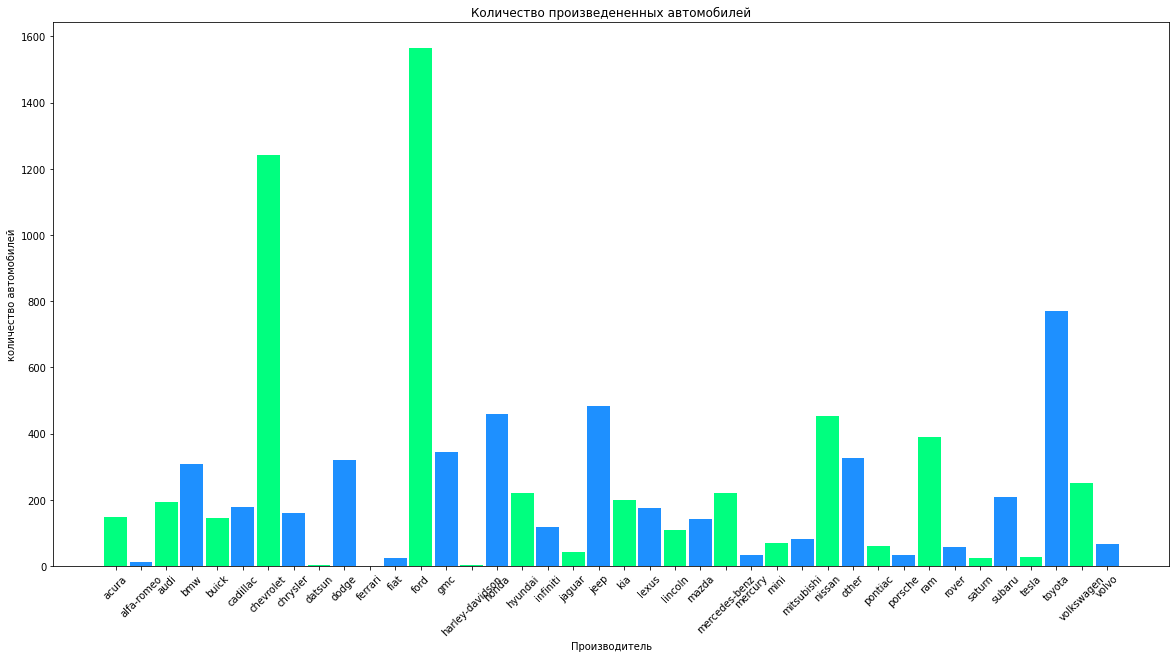

In [39]:
# Ваш код здесь
plt.figure(figsize=(20,10))
colors1 = ['springgreen','dodgerblue']
plt.bar(manufacturer_counts['Производитель'],manufacturer_counts['Количество автомобилей'] , width=0.9 , color = colors1)
plt.title('Количество произведененных автомобилей')
plt.xlabel('Производитель')
plt.ylabel('количество автомобилей')
plt.xticks(rotation=45)
plt.show()

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [41]:
# Ваш код здесь
transmission_counts = df_new.groupby('transmission').size().reset_index(name='Количество автомобилей')
transmission_counts = transmission_counts.rename(columns={'transmission': 'Коробка передач'})
transmission_counts

,Коробка передач,Количество автомобилей
0,automatic,7400
1,manual,612
2,other,1649


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


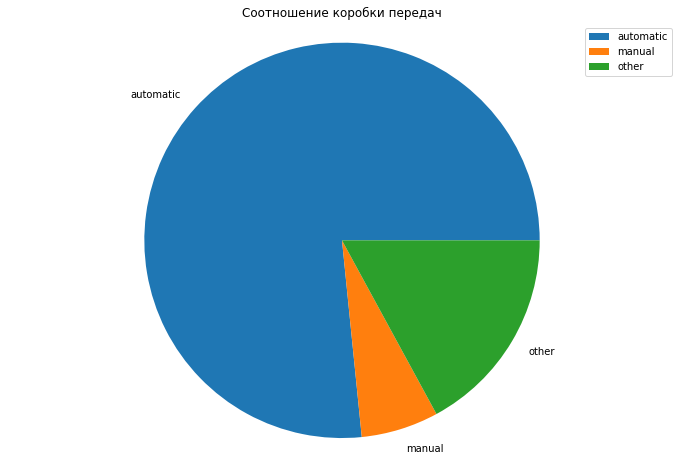

In [42]:
# Ваш код здесь
plt.figure(figsize=(12,8))
plt.pie(transmission_counts['Количество автомобилей'],labels = transmission_counts['Коробка передач'],pctdistance=0.85)
plt.title('Соотношение коробки передач')
plt.axis('equal')
plt.legend(loc='upper right', labels=transmission_counts['Коробка передач'])
plt.show()